In [1]:
import math 
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
# Initalizing the mediapipe pose class 
mp_pose=mp.solutions.pose

pose=mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2,smooth_landmarks=False)
mp_drawing=mp.solutions.drawing_utils 

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


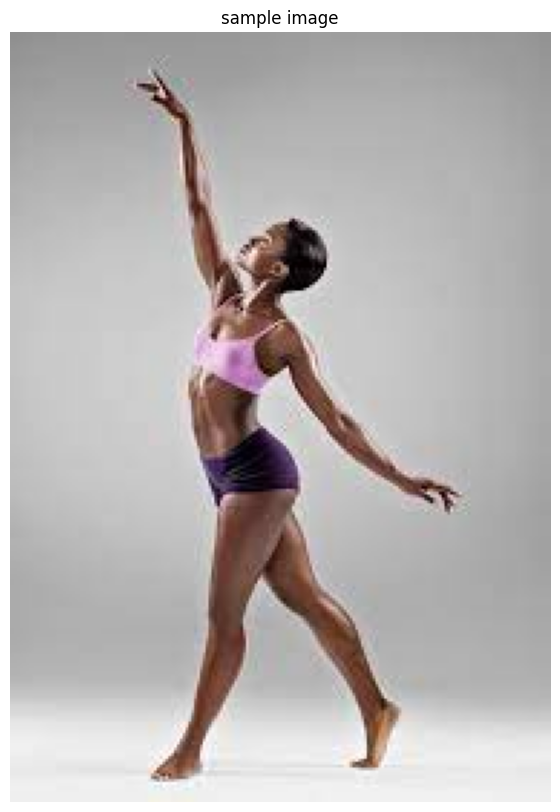

In [4]:
sample_img=cv2.imread("/Users/kiranbabu/Desktop/image1.jpeg")
plt.figure(figsize=[10,10])
plt.title("sample image")
plt.axis('off')
plt.imshow(sample_img[:,:,::-1])
plt.show()

In [5]:
results=pose.process(sample_img[:,:,::-1])

if results.pose_landmarks:
    for i in range(32):
        print(f'{mp_pose.PoseLandmark(i).name}: \n {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE: 
 x: 0.4414171576499939
y: 0.2695324122905731
z: -0.27533891797065735
visibility: 0.9998893737792969

LEFT_EYE_INNER: 
 x: 0.46798911690711975
y: 0.26823198795318604
z: -0.2765209674835205
visibility: 0.9998980760574341

LEFT_EYE: 
 x: 0.47046202421188354
y: 0.2709217071533203
z: -0.2772373855113983
visibility: 0.9999184608459473

LEFT_EYE_OUTER: 
 x: 0.472374826669693
y: 0.2739526331424713
z: -0.2771337032318115
visibility: 0.9999375343322754

RIGHT_EYE_INNER: 
 x: 0.46698445081710815
y: 0.26630017161369324
z: -0.2297331839799881
visibility: 0.9998754262924194

RIGHT_EYE: 
 x: 0.46779558062553406
y: 0.26741448044776917
z: -0.23046955466270447
visibility: 0.9999027252197266

RIGHT_EYE_OUTER: 
 x: 0.46796756982803345
y: 0.2683561444282532
z: -0.23073425889015198
visibility: 0.9998995065689087

LEFT_EAR: 
 x: 0.491112619638443
y: 0.2977524697780609
z: -0.262382447719574
visibility: 0.9999686479568481

RIGHT_EAR: 
 x: 0.4781700372695923
y: 0.2856605350971222
z: -0.05337068438529968


In [6]:
# convert the normalized landmark to original scale by using width and height of image 
image_height,image_width,_=sample_img.shape

if results.pose_landmarks:
    
    for i in range(32):
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x*image_width}')
        print(f'y:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y*image_height}')
        print(f'z:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z*image_width}')
        print(f'visiblity: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')
#         print(f'visiblity: {results.pose_landmarls.landmark[mp_pose.PoseLandmark(i).value].visib}')

NOSE:
x: 82.98642563819885
y:72.2346864938736
z:-51.76371657848358
visiblity: 0.9998893737792969

LEFT_EYE_INNER:
x: 87.98195397853851
y:71.88617277145386
z:-51.985941886901855
visiblity: 0.9998980760574341

LEFT_EYE:
x: 88.4468605518341
y:72.60701751708984
z:-52.12062847614288
visiblity: 0.9999184608459473

LEFT_EYE_OUTER:
x: 88.80646741390228
y:73.41930568218231
z:-52.101136207580566
visiblity: 0.9999375343322754

RIGHT_EYE_INNER:
x: 87.79307675361633
y:71.36844599246979
z:-43.18983858823776
visiblity: 0.9998754262924194

RIGHT_EYE:
x: 87.9455691576004
y:71.66708076000214
z:-43.32827627658844
visiblity: 0.9999027252197266

RIGHT_EYE_OUTER:
x: 87.97790312767029
y:71.91944670677185
z:-43.37804067134857
visiblity: 0.9998995065689087

LEFT_EAR:
x: 92.32917249202728
y:79.79766190052032
z:-49.32790017127991
visiblity: 0.9999686479568481

RIGHT_EAR:
x: 89.89596700668335
y:76.55702340602875
z:-10.03368866443634
visiblity: 0.9998064637184143

MOUTH_LEFT:
x: 81.50612819194794
y:77.259498000144

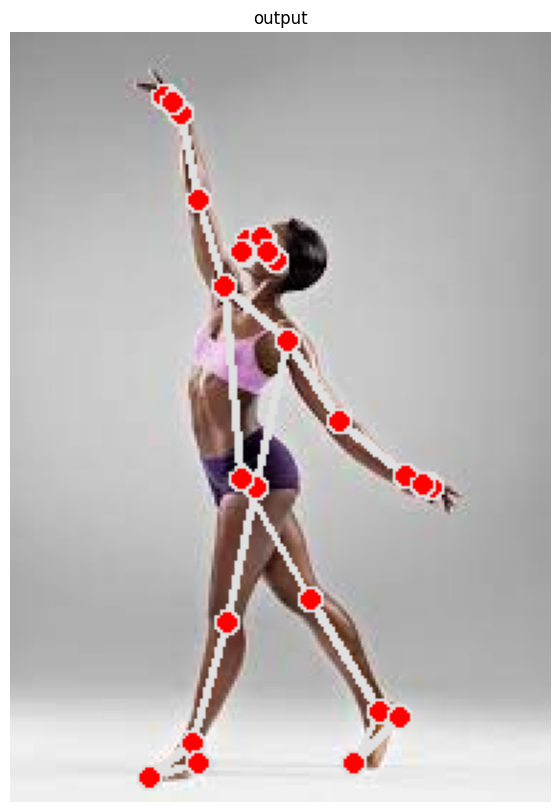

In [7]:
img_copy=sample_img.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img_copy,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
    
    fig=plt.figure(figsize=[10,10])
    
    plt.title("output")
    plt.axis("off")
    plt.imshow(img_copy[:,:,::-1])
    plt.show()

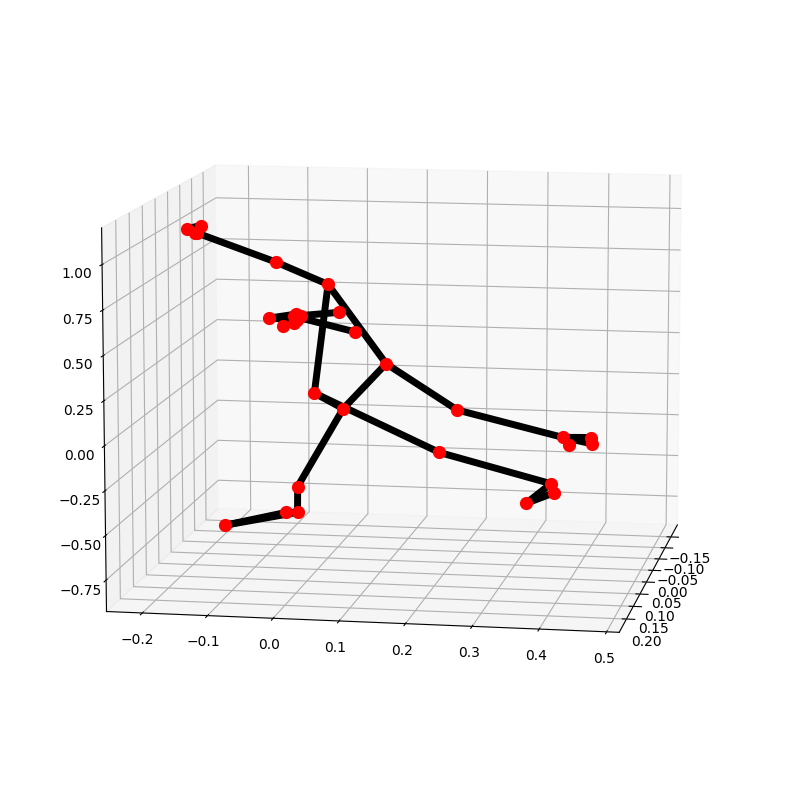

In [8]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [3]:
def detectPose(image,pose,display=True):
    
    output_image=image.copy()
    imageRGB=image[:,:,::-1]
    results=pose.process(imageRGB)
    height,width,_=image.shape
    landmarks=[]
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_image,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x*width),int(landmark.y*height),(landmark.z*width)))
            
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title("original image")
        plt.axis('off')
        plt.subplot(122)
        plt.imshow(output_image[:,:,::-1])
        plt.title("output image")
        plt.axis('off')
    else:
        return output_image,landmarks

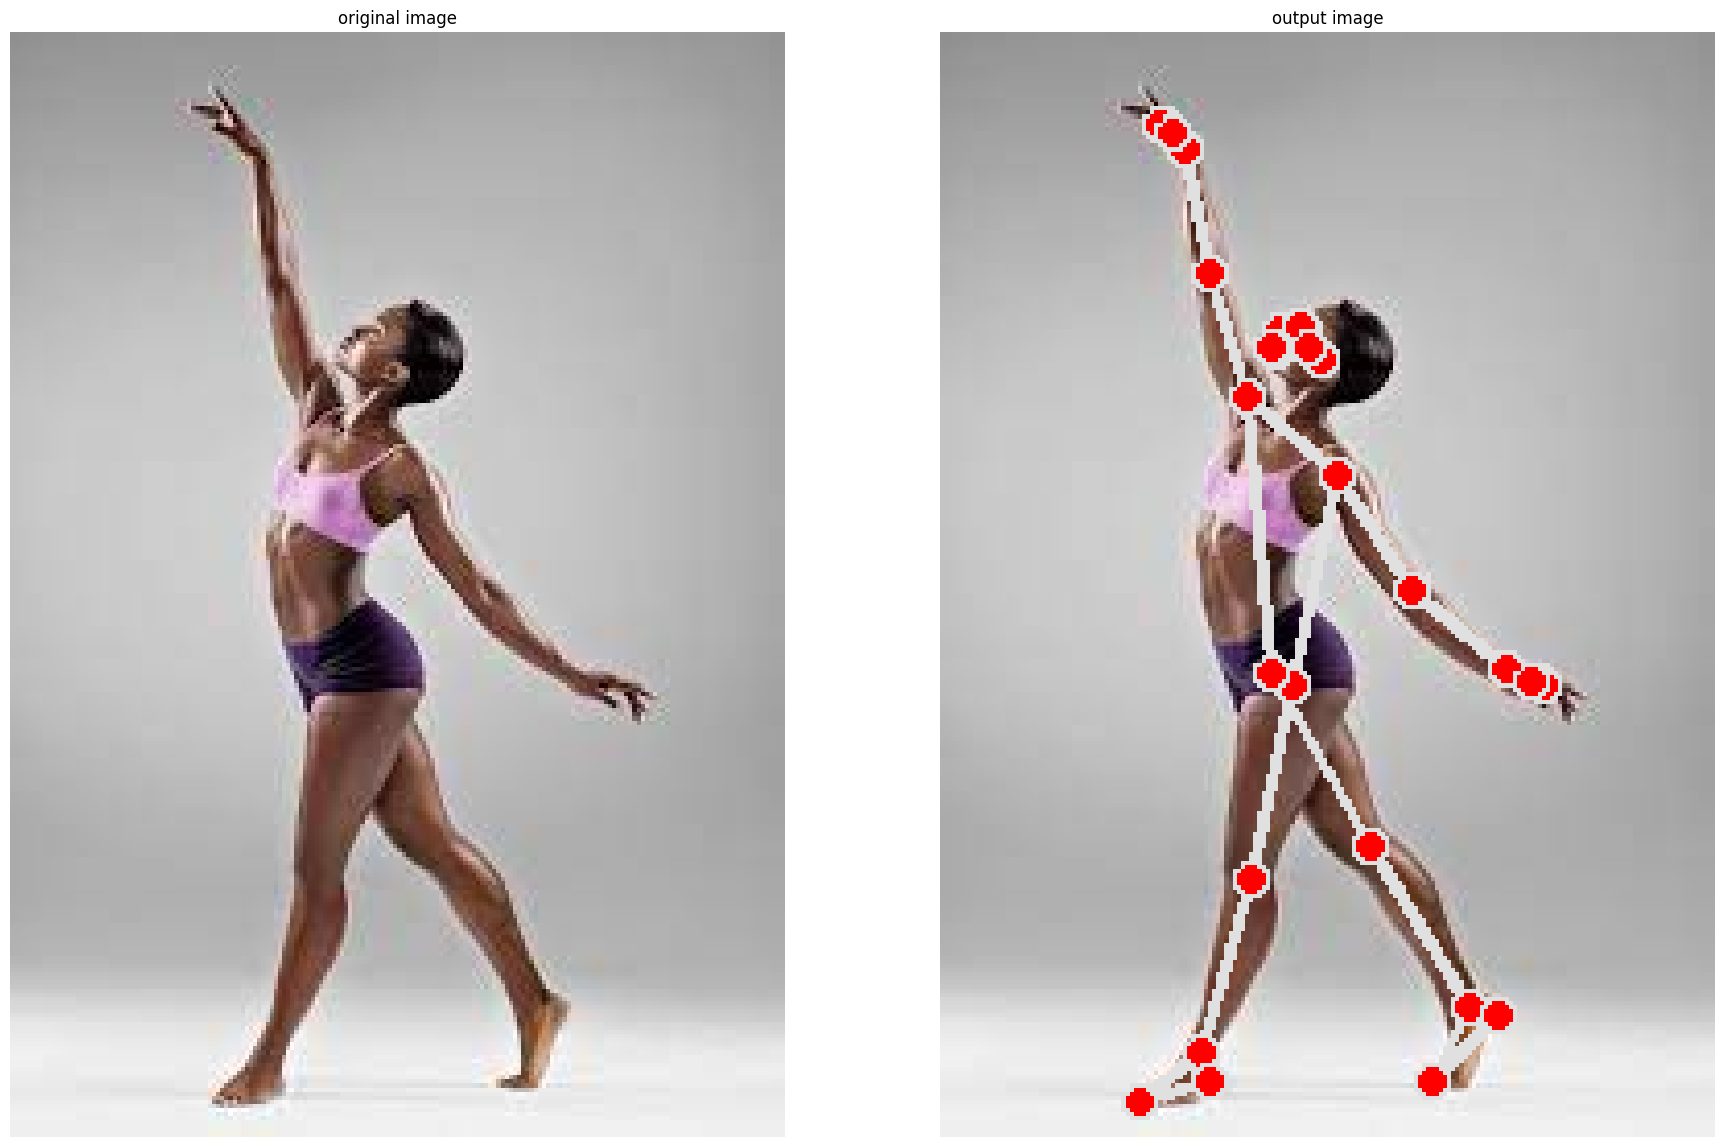

In [4]:
image=cv2.imread('/Users/kiranbabu/Desktop/image1.jpeg')
detectPose(image,pose,display=True)

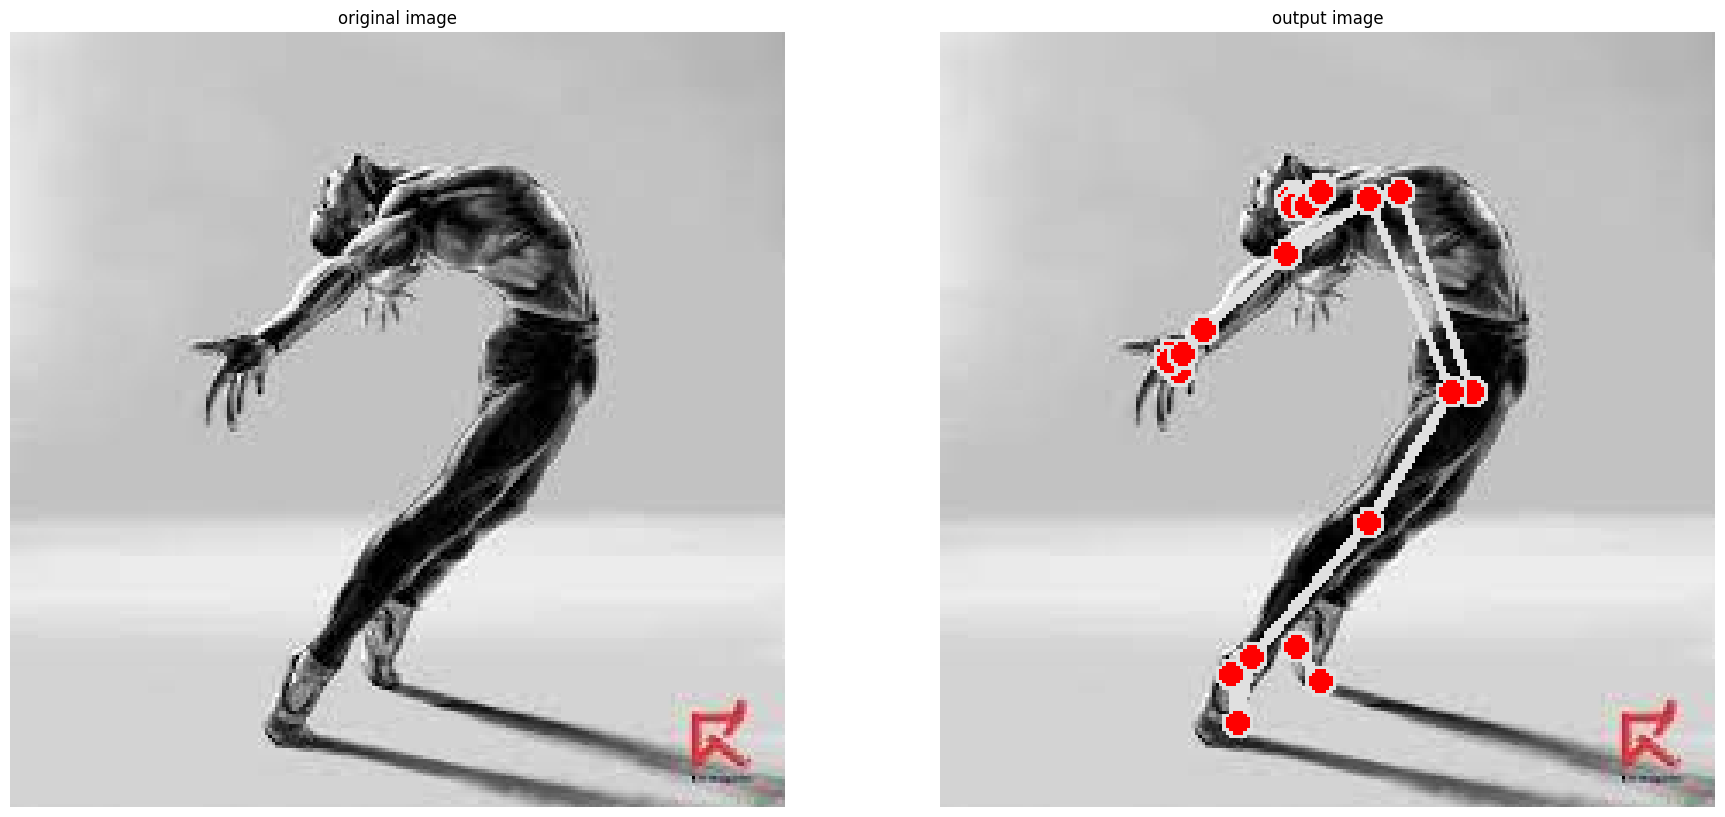

In [11]:
image=cv2.imread('/Users/kiranbabu/Desktop/image2.jpeg')
detectPose(image,pose,display=True)

In [12]:
#realtime webcam 

In [1]:
from time import time
pose_video=mp_pose.Pose(static_image_mode=False,min_detection_confidence=0.3,model_complexity=2)

video=cv2.VideoCapture(0)
cv2.namedWindow("pose detection",cv2.WINDOW_NORMAL)
video.set(3,1280)
video.set(4,960)

time1=0 
while video.isOpened():
    ok,frame=video.read()
    if not ok :
        break 
    frame =cv2.flip(frame,1)
    frame_height,frame_width,_ =frame.shape
    frame=cv2.resize(frame,(int(frame_width*(640/frame_height)),640))
    frame,_=detectPose(frame,pose_video,display=False)
    time2=time()
    if (time2-time1)>0:
        frames_per_second=1.0/(time2-time1)
        
        cv2.putText(frame,'FPS:{}'.format(int(frames_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),3)
    time1=time2
    cv2.imshow('pose detection',frame)
    k=cv2.wiatKey(1) & 0xFF
    
    if(k==27):
        break
video.release()
cv2.destroyAllWindows()

NameError: name 'mp_pose' is not defined